In [7]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [8]:
# dataset
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [9]:
def stochastic_gradient_descent (X_b, y, n_epochs=50, learning_rate=0.00001):
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # pick a random sample
            random_index = np.random.randint(N)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # compute output
            oi = xi.dot(thetas)

            # compute loss li
            li = (oi - yi)*(oi - yi) / 2

            # compute gradient for loss
            g_li = (oi - yi)

            # compute gradient
            gradients = xi.T.dot(g_li)

            # update theta
            thetas = thetas - learning_rate*gradients

            # logging
            thetas_path.append(thetas)
            losses.append(li[0][0])

    return thetas_path, losses

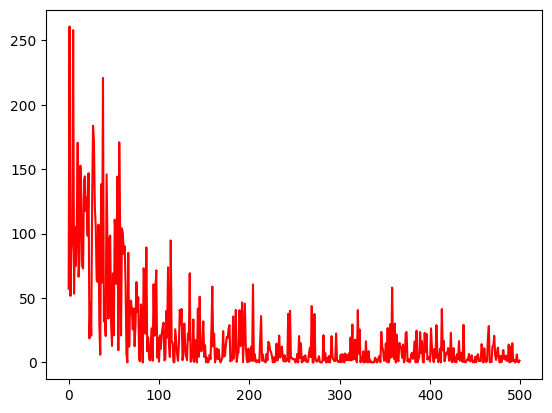

In [10]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [11]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffle data
        shuffled_indices = np.random.permutation(N)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            # pick a minibatch
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # compute output
            output = xi.dot(thetas)

            # compute loss li
            loss = ((output - yi)**2) / 2

            # compute gradient for loss
            loss_grd = (output - yi)/minibatch_size

            # compute gradient
            gradients = xi.T.dot(loss_grd)

            # update parameter
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

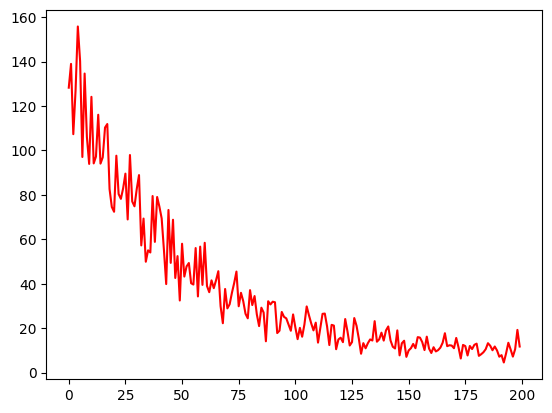

In [12]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [13]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # compute output
        output = X_b.dot(thetas)

        # compute loss
        loss = (output - y)**2

        # compute gradient for loss
        loss_grd = 2*(output - y)/N

        # compute gradient
        gradients = X_b.T.dot(loss_grd)

        # update parameter
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

        loss_mean = np.sum(loss) / N
        losses.append(loss_mean)

    return thetas_path, losses

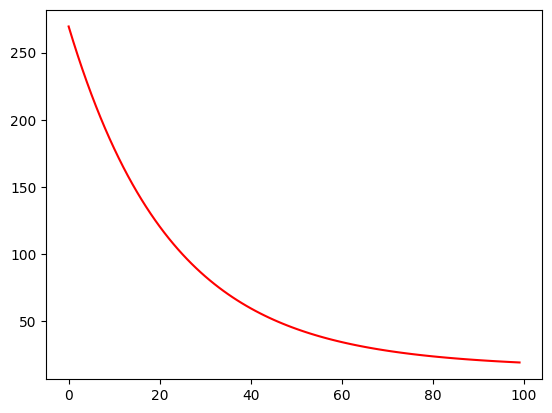

In [14]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()